In [2]:
## Data manapulation
import pandas as pd
import numpy as np

# Data visualize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r'../Data/train.csv')

In [4]:
pd.options.display.max_columns=150

In [5]:
## Families without head of household
households_leader = train.groupby('idhogar')['parentesco1'].sum()

## Findhousehold without a head
households_no_head = households_leader.value_counts()

households_no_head

1    2973
0      15
Name: parentesco1, dtype: int64

 There are 15 houses without head

In [6]:
## Findhousehold without a head where label are different
household_without_head = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1).value_counts()

household_without_head

True     2903
False      85
Name: Target, dtype: int64

## Error  & correction
Investigate the data where household have a head and different poverty level

In [7]:
# Iterate through each household
## Find all identifier where Target is not same
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_equal = all_equal[all_equal !=True]

not_equal.shape

(85,)

In [8]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [9]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] ==1.0)]['Target'])
    
    ## Set the correct label for all emmber of household
    train.loc[train['idhogar'] == household, 'Target'] = true_target

## Missing Values

In [10]:
## Number of missing values in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'Total'})

In [11]:
missing.head()

,Total
Id,0
v2a1,6860
hacdor,0
rooms,0
hacapo,0


In [12]:
missing['Percentage'] = missing['Total']/ len(train)

missing.sort_values('Percentage', ascending= False).head(10)

,Total,Percentage
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


### There are 3 columns with high missing values and 2 columns with low missing values
lets start with v18q1

In [13]:
## Function of plot value_counts

def plot_value_counts(df , col, head_only=False):
    '''Plot the counts of a column , option: only the heads of a household'''
    if head_only:
        df = df.loc[df['parentesco1']==1].copy()
    
    plt.figure(figsize=(6,8))
    df[col].value_counts(dropna = False).sort_index().plot(kind='bar', color = 'b', edgecolor='k', linewidth = 2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} value_counts')
    plt.ylabel('Count')


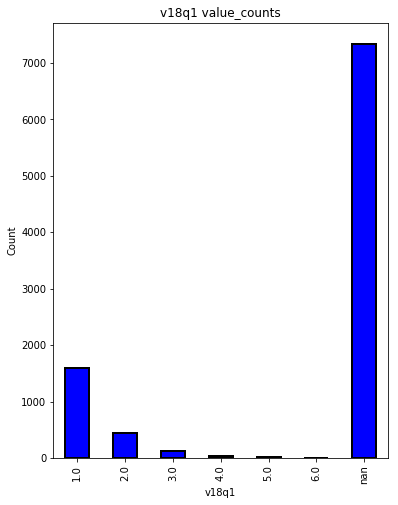

In [14]:
plot_value_counts(train, 'v18q1', head_only=False)

    v18q=  owns a tablet
    v18q1= number of tablets household owns

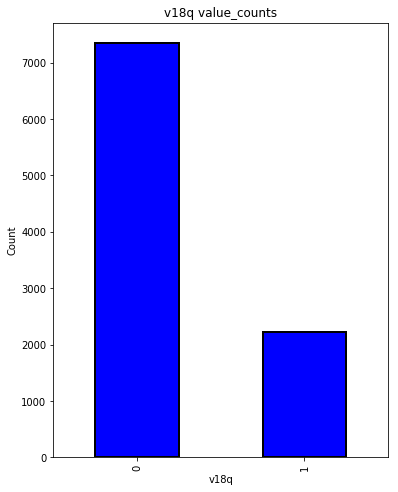

In [15]:
plot_value_counts(train, 'v18q', head_only=False)

In [16]:
train['v18q1'].value_counts(dropna=False)

NaN     7342
 1.0    1586
 2.0     444
 3.0     129
 4.0      37
 5.0      13
 6.0       6
Name: v18q1, dtype: int64

In [17]:
train['v18q'].value_counts(dropna=False)

0    7342
1    2215
Name: v18q, dtype: int64

Here we see that families who doesnot owns a tablet i.e v18q =0, is 7342, and the missing value in v18q1 is also 7342

In [18]:
train['v18q1'].value_counts(dropna=False)

NaN     7342
 1.0    1586
 2.0     444
 3.0     129
 4.0      37
 5.0      13
 6.0       6
Name: v18q1, dtype: int64

We can fill the missing with 0

In [19]:
train['v18q1']= train['v18q1'].fillna(0)

#### Now lets take the second column which contains NA  "v2a1"

In [20]:
train['v2a1'].value_counts(dropna=False).head(10)

NaN          6860
 150000.0     233
 100000.0     181
 200000.0     159
 120000.0     149
 50000.0      118
 80000.0      104
 90000.0       81
 70000.0       79
 180000.0      77
Name: v2a1, dtype: int64

     v2a1 = Monthly rent payment
     tipovivi3, =1 rented
    Does the missing value in v2a1 is related to tipovivi columns

In [21]:
## Select all the tipov columns, as they indicate 
own_variables = [x for x in train if x.startswith('tipo')]

Text(0.5, 1.0, 'Home ownership vs Missing rent')

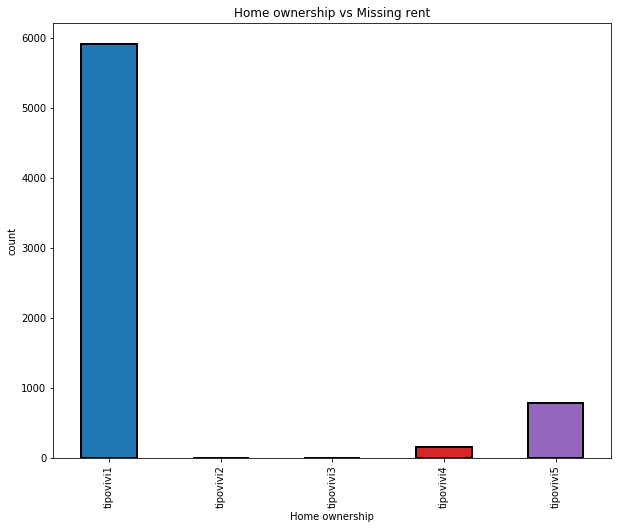

In [22]:
## plot the missing rent with own_variables

train.loc[train['v2a1'].isnull(), own_variables].sum().plot(kind='bar', edgecolor='k', linewidth= 2, figsize= (10,8))
plt.xlabel('Home ownership')
plt.ylabel('count')
plt.title('Home ownership vs Missing rent')
#plt.xticks([1,2,3,4,5], ["own house", "own_installments", "rented", "not_secure", "others"] )

In [23]:
## House that are owned, fill them with 0 rents

train.loc[train['tipovivi1']==1, 'v2a1'] = 0

In [24]:
## Checkpoint 1

train_1 = train.copy()

## Checkpoint

In [25]:
# Create missing rent payment column
train['missing_v2a1'] = train['v2a1'].isnull()

In [26]:
train['missing_v2a1'].value_counts()

False    8608
True      949
Name: missing_v2a1, dtype: int64

In [27]:
train['v2a1'].value_counts(dropna=False).head()

 0.0         5940
NaN           949
 150000.0     233
 100000.0     181
 200000.0     159
Name: v2a1, dtype: int64

In [28]:
train.loc[train['rez_esc'].isnull(), ('rez_esc', 'escolari', 'age')].describe()

,rez_esc,escolari,age
count,0.0,7928.000000,7928.000000
mean,NaN,7.647704,38.833249
std,NaN,4.903780,20.989486
min,NaN,0.000000,0.000000
25%,NaN,5.000000,24.000000
50%,NaN,7.000000,38.000000
75%,NaN,11.000000,54.000000
max,NaN,21.000000,97.000000


# Plot two categorical variables

    Thete are three popular options, scatterplot, facet-bar plot, boxplot
    But none of them are effecient in this scenario
    Here the size of the points represent the percentage of a given y value, represented by each x value

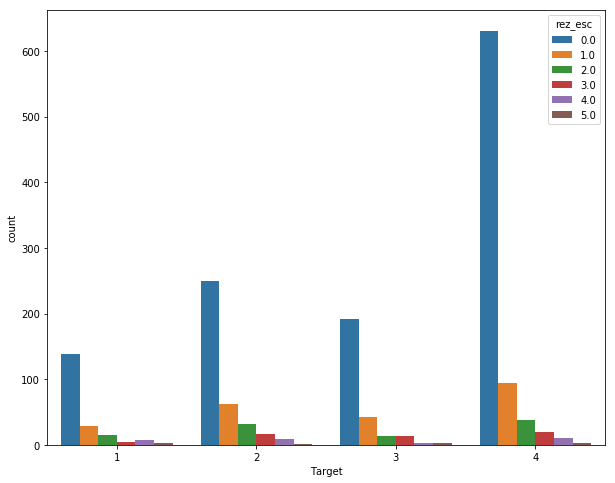

In [29]:
plt.figure(figsize= (10,8))
sns.countplot(x='Target', hue='rez_esc', data=train)

In [30]:
train['Target'].value_counts(dropna=False)

4    6004
2    1558
3    1221
1     774
Name: Target, dtype: int64

People with their own house doesnot have a year drop, where as under priviledge once are always has a year back

## Column Definition:
We need to identify boolean, categorical and numerical variable, this can be done by data deinition chart. We need to seperate them because every type should be treated differently.
after differenciating them we need to seperate them at indivisual and household level.
Once we have different type of variables, we can aggregate them accordingly.

The steps of this process is as follows:

1. Break variables into household and indivisual level.

2. Find suitable aggregation for indivisual level data
        ordinal variable can used statical aggregation
        Boolean variables can also be aggregated
        Categorical variable can be converted into numerical
    
3. Join indivisual aggregation to household data

### Defining variable category

Below are few types of categorical variables

1. Indivisual variables: Characteristics of indivisual rather than household variables
        Boolean
        Ordinal
        
2. Household variable:
        Boolean
        Ordinal
        Numeric
        
3. Squared variable
4. ID variable

In [31]:
id_ = ['Id', 'idhogar', 'Target']

In [32]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [33]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [34]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

## Check that we covered all columns

In [35]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == train.shape[1])

There are no repeats:  True
We covered every variable:  True


C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


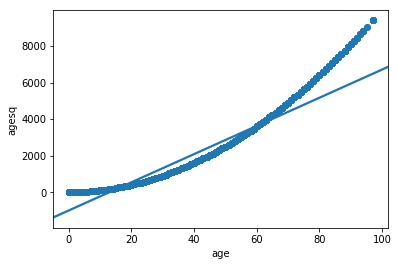

In [36]:
sns.regplot('age', 'agesq', train)

Drop all the columns with square

## Checkpoint 2

In [37]:
train_2 = train.copy()

In [38]:
## Removing the squared variable

train = train.drop(columns = sqr_)

In [39]:
train.shape

(9557, 135)

In [40]:
train_2.shape

(9557, 144)

### ID level variables

Lets keep the ID level variables as it is

### household level variables

Those variables where household value is 1 and all the respective columns, which has value when ID level variuables is 1

In [41]:
heads = train.loc[train['parentesco1']==1]

In [42]:
## Capture only those columns, which belong to household along with ID

heads = heads[id_ + hh_bool + hh_ordered + hh_cont]

In [43]:
heads.shape

(2973, 98)

    These are household features,
    We are focusing on household predictors because we want to predict about each household
    lets drop some of them if they are redundent or not contributing to the target,
    or other variables which are duplicare, constant, quasi constant, also make some new powerfull predictors with the help of other predictors

### Redundant or duplicatre or constant features

Lets look at all the household variables, if we find highly correlated variables, we would remove them

In [44]:
## Lets chose a correlation which is higher than 0.95
## Lets choose only the numerical variables
heads.select_dtypes(exclude='category').shape


(2973, 98)

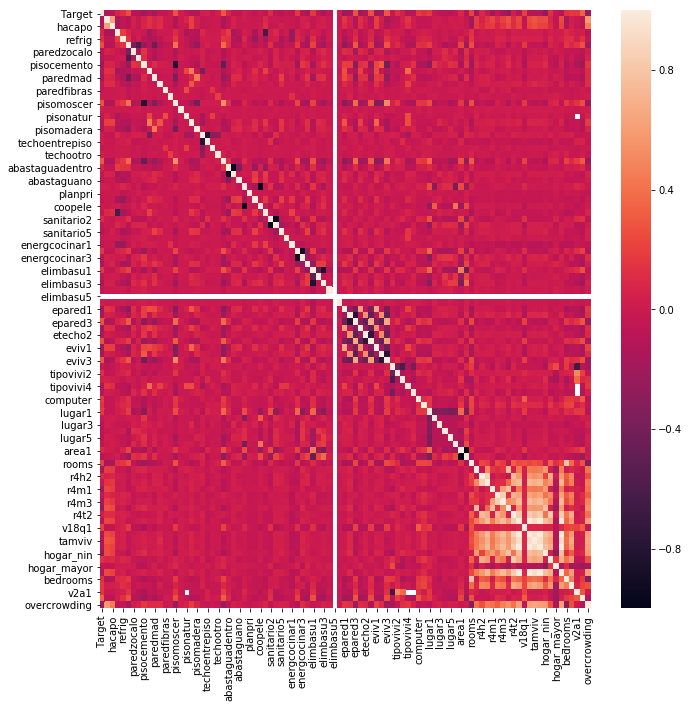

In [45]:
#We do not have any categorical variable
corrmat = heads.corr()


fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)


Here the diagonal represents the correlation of the variable with itself, black spots denotes highly correlated variables

We see a white line vertical and horizontal lines passing through the center of the plot, I will investigate it later

In [46]:
# Nothing is clear here, in heatmap, so we build a dataframe with correlation between features
# The sign is not important, but the absolute value is important
# We will just take the absolute value and drop the sign of the features.

coremat = heads.corr()
coremat = coremat.abs()

In [47]:
coremat.head()

,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,rooms,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,v18q1,tamhog,tamviv,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,bedrooms,qmobilephone,v2a1,meaneduc,overcrowding
Target,1.000000,0.136275,0.096313,0.068230,0.119607,0.254469,0.078851,0.104545,0.209131,0.096893,0.152979,0.040128,0.039861,0.005231,0.275452,0.016832,0.054463,0.114144,0.103487,0.014357,0.032872,0.026240,0.031516,0.295249,0.062961,0.046518,0.055818,0.021908,0.009437,0.051036,0.007696,0.049932,0.097592,0.062316,0.083835,0.017669,0.054739,0.158804,0.083063,0.162796,0.156930,0.060286,0.142433,0.041221,NaN,0.023812,0.208170,0.162652,0.280947,0.209181,0.128644,0.261142,0.217908,0.174310,0.293540,0.022316,0.131069,0.032834,0.109057,0.095326,0.173324,0.137407,0.175124,0.019746,0.085646,0.084516,0.079679,0.047958,0.089509,0.089509,0.201019,0.186530,0.086395,0.023307,0.209479,0.038193,0.142157,0.260917,0.036476,0.111489,0.197493,0.111557,0.122554,0.111557,0.266309,0.127904,0.025173,0.111557,0.135203,0.168685,0.161353,0.333652,0.234954
hacdor,0.136275,1.000000,0.624324,0.143713,0.055073,0.105112,0.053262,0.021422,0.060396,0.139910,0.072131,0.101985,0.006039,0.005401,0.130923,0.003818,0.068883,0.191171,0.045614,0.037777,0.021824,0.008108,0.007148,0.134352,0.051855,0.058215,0.008967,0.015910,0.003818,0.008108,0.013844,0.088413,0.006580,0.002880,0.016964,0.007148,0.010478,0.050384,0.042438,0.023042,0.027280,0.001265,0.032345,0.005401,NaN,0.005401,0.150762,0.047898,0.137802,0.122137,0.038463,0.119052,0.190081,0.034392,0.149066,0.064282,0.047444,0.052335,0.151861,0.021870,0.048189,0.040258,0.029605,0.010581,0.026791,0.010283,0.025574,0.001103,0.025404,0.025404,0.181283,0.186709,0.057368,0.147793,0.220037,0.105136,0.200622,0.268084,0.110120,0.233964,0.056616,0.234749,0.283206,0.234749,0.256228,0.074122,0.046097,0.234749,0.162266,0.030302,0.013642,0.067632,0.583197
hacapo,0.096313,0.624324,1.000000,0.154749,0.062110,0.092562,0.036795,0.020661,0.062616,0.124520,0.066715,0.111904,0.004544,0.004064,0.124567,0.002873,0.003519,0.206423,0.032552,0.048015,0.016422,0.006101,0.005379,0.125825,0.048910,0.054289,0.006747,0.008789,0.002873,0.006101,0.010760,0.122333,0.022836,0.008292,0.041293,0.005379,0.007884,0.044062,0.018669,0.063279,0.046656,0.016337,0.045107,0.004064,NaN,0.004064,0.114890,0.032241,0.101011,0.102290,0.006424,0.076188,0.193764,0.000453,0.120487,0.034762,0.035699,0.027959,0.110707,0.010169,0.036260,0.038271,0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,0.015219,0.172382,0.174432,0.088729,0.168476,0.183967,0.064559,0.149317,0.236029,0.105777,0.213128,0.045953,0.213700,0.263010,0.213700,0.204935,0.099435,0.027500,0.213700,0.102256,0.044939,0.016778,0.076277,0.445405
v14a,0.068230,0.143713,0.154749,1.000000,0.192954,0.075308,0.011317,0.001342,0.015043,0.188425,0.057004,0.007657,0.003113,0.002784,0.098117,0.001968,0.138091,0.070795,0.105688,0.085378,0.011248,0.004179,0.003684,0.084577,0.186949,0.173224,0.068852,0.029051,0.001968,0.158222,0.012141,0.624212,0.019500,0.091473,0.030463,0.003684,0.246445,0.058683,0.004059,0.046878,0.042431,0.013399,0.058385,0.002784,NaN,0.002784,0.077470,0.016724,0.063399,0.062741,0.022349,0.063519,0.066221,0.028708,0.067141,0.005645,0.024453,0.000819,0.062780,0.008739,0.009755,0.045345,0.018571,0.007181,0.015806,0.006585,0.021979,0.005262,0.018117,0.018117,0.13641

In [48]:
coremat =coremat.unstack()

In [49]:
coremat = coremat.sort_values(ascending = False)

In [50]:
coremat = coremat[coremat>=0.95]

In [51]:
coremat.head()

overcrowding  overcrowding    1.0
r4h1          r4h1            1.0
area2         area2           1.0
              area1           1.0
area1         area2           1.0
dtype: float64

In [52]:
coremat = pd.DataFrame(coremat).reset_index()


In [53]:
coremat.head()

,level_0,level_1,0
0,overcrowding,overcrowding,1.0
1,r4h1,r4h1,1.0
2,area2,area2,1.0
3,area2,area1,1.0
4,area1,area2,1.0


In [54]:
coremat.columns = ['feat1', 'feat2', 'corr']

In [55]:
coremat.head()

,feat1,feat2,corr
0,overcrowding,overcrowding,1.0
1,r4h1,r4h1,1.0
2,area2,area2,1.0
3,area2,area1,1.0
4,area1,area2,1.0


In [56]:
coremat.shape

(108, 3)

In [57]:
## There are too many columns, lets increase the threshold value

In [58]:
#Create a df where two columns are different

coremat_1 = coremat.copy()

In [59]:
coremat_2 = coremat_1[coremat_1['feat1'] != coremat_1['feat2']]

In [60]:
coremat_2 = coremat_1.set_index('feat1').T

In [61]:
coremat_2

feat1,overcrowding,r4h1,area2,area2,area1,area1,lugar6,lugar5,lugar4,lugar3,lugar2,lugar1,television,computer,tipovivi5,tipovivi4,tipovivi3,tipovivi2,tipovivi1,eviv3,eviv2,eviv1,etecho3,rooms,r4h2,v2a1,r4h3,bedrooms,hogar_total,hogar_total,hogar_total,hogar_mayor,hogar_adul,hogar_nin,hhsize,hhsize,hhsize,tamviv,tamhog,tamhog,tamhog,v18q1,r4t3,r4t2,r4t1,r4m3,r4m2,r4m1,etecho2,etecho1,epared3,epared2,techocane,techoentrepiso,techozinc,pisomadera,pisonotiene,pisonatur,pisoother,pisomoscer,paredother,paredfibras,paredzinc,paredmad,pareddes,pisocemento,paredpreb,paredzocalo,paredblolad,refrig,v14a,hacapo,hacdor,techootro,cielorazo,abastaguadentro,energcocinar1,epared1,elimbasu6,elimbasu4,elimbasu3,elimbasu2,elimbasu1,energcocinar4,energcocinar3,energcocinar2,sanitario6,abastaguafuera,sanitario5,sanitario3,sanitario2,sanitario1,coopele,noelec,planpri,public,abastaguano,qmobilephone,Target,meaneduc,r4t3,r4t3,hhsize,tamhog,r4t3,hogar_total,coopele,public
feat2,overcrowding,r4h1,area2,area1,area2,area1,lugar6,lugar5,lugar4,lugar3,lugar2,lugar1,television,computer,tipovivi5,tipovivi4,tipovivi3,tipovivi2,tipovivi1,eviv3,eviv2,eviv1,etecho3,rooms,r4h2,v2a1,r4h3,bedrooms,hogar_total,hhsize,tamhog,hogar_mayor,hogar_adul,hogar_nin,hogar_total,hhsize,tamhog,tamviv,hogar_total,hhsize,tamhog,v18q1,r4t3,r4t2,r4t1,r4m3,r4m2,r4m1,etecho2,etecho1,epared3,epared2,techocane,techoentrepiso,techozinc,pisomadera,pisonotiene,pisonatur,pisoother,pisomoscer,paredother,paredfibras,paredzinc,paredmad,pareddes,pisocemento,paredpreb,paredzocalo,paredblolad,refrig,v14a,hacapo,hacdor,techootro,cielorazo,abastaguadentro,energcocinar1,epared1,elimbasu6,elimbasu4,elimbasu3,elimbasu2,elimbasu1,energcocinar4,energcocinar3,energcocinar2,sanitario6,abastaguafuera,sanitario5,sanitario3,sanitario2,sanitario1,coopele,noelec,planpri,public,abastaguano,qmobilephone,Target,meaneduc,hhsize,tamhog,r4t3,r4t3,hogar_total,r4t3,public,coopele
corr,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.996884,0.996884,0.996884,0.996884,0.996884,0.996884,0.974788,0.974788


In [62]:
coremat_3 = coremat_1.set_index('feat1').T

In [63]:
coremat_3.columns

Index(['overcrowding', 'r4h1', 'area2', 'area2', 'area1', 'area1', 'lugar6',
       'lugar5', 'lugar4', 'lugar3',
       ...
       'Target', 'meaneduc', 'r4t3', 'r4t3', 'hhsize', 'tamhog', 'r4t3',
       'hogar_total', 'coopele', 'public'],
      dtype='object', name='feat1', length=108)

In [64]:
## Heatmap of correlated features

corrmat_new = heads[['area2', 'area1', 'hogar_total', 'hogar_total', 'hhsize', 'hhsize', 'tamhog', 'tamhog', 'r4t3', 'r4t3', 'hhsize', 'tamhog', 'r4t3', 'hogar_total', 'coopele', 'public']]


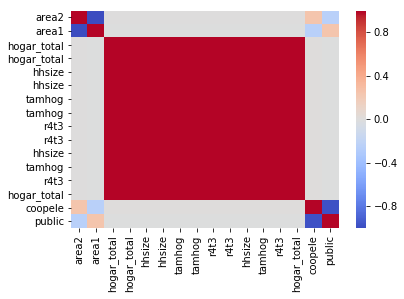

In [65]:
corrmat_new = corrmat_new.corr()
sns.heatmap(corrmat_new, cmap='coolwarm')

In [66]:
unique_items = set(['area2', 'area1', 'hogar_total', 'hogar_total', 'hhsize', 'hhsize', 'tamhog', 'tamhog', 'r4t3', 'r4t3', 'hhsize', 'tamhog', 'r4t3', 'hogar_total', 'coopele', 'public'])

In [67]:
unique_items = list(unique_items)

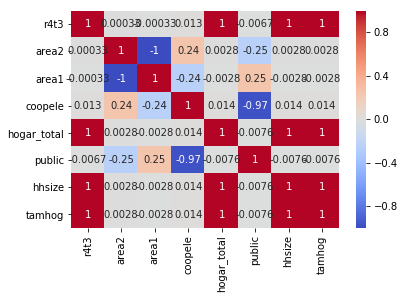

In [68]:
corrmat_new = heads[unique_items]
corrmat_new = corrmat_new.corr()
sns.heatmap(corrmat_new, cmap='coolwarm', annot=True)

In [69]:
unique_items

['r4t3',
 'area2',
 'area1',
 'coopele',
 'hogar_total',
 'public',
 'hhsize',
 'tamhog']

    'hhsize', - household size
     'area1', - zona urbana
     'hogar_total', - of total individuals in the household
     'coopele',- electricity from cooperative
     'area2',- zona rural
     'public',- electricity from CNFL,  ICE,  ESPH/JASEC"
     'r4t3',- Total persons in the household
     'tamhog'- size of the household

In [70]:
heads['tamviv'].value_counts()

3     742
2     667
4     607
1     355
5     335
6     155
7      61
8      17
9      12
10      9
11      6
13      4
12      2
15      1
Name: tamviv, dtype: int64

In [71]:
heads['hhsize'].value_counts()

3     753
2     682
4     612
1     386
5     317
6     136
7      52
8      12
9      10
10      6
11      4
12      2
13      1
Name: hhsize, dtype: int64

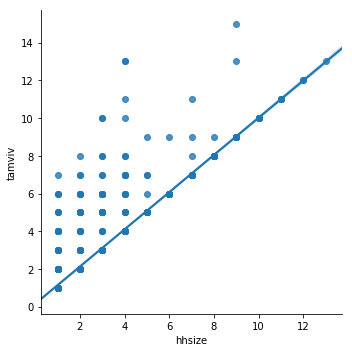

In [72]:
## lets understand the relationship between these two variables

sns.lmplot('hhsize', 'tamviv', heads)

In [73]:
## Tamviv - number of people living in household
## hhsize - size of hhousehold

In [74]:
heads[(heads['hhsize']>10)][['hhsize', 'tamviv', 'Target']]

,hhsize,tamviv,Target
442,11,11,4
2474,13,13,1
2638,11,11,4
5136,11,11,3
5699,12,12,3
8444,11,11,2
9083,12,12,4


In [75]:
heads[(heads['hhsize']>10)][[ 'Target']]

,Target
442,4
2474,1
2638,4
5136,3
5699,3
8444,2
9083,4


Substract the two columns hhsize and tamviv

In [76]:
heads.shape

(2973, 98)

In [77]:
heads['hhsize-diff'] = heads['tamviv']-heads['hhsize']

In [78]:
heads['hhsize-diff'].value_counts()

0    2861
1      29
3      26
2      26
4      15
5       7
6       4
7       3
9       2
Name: hhsize-diff, dtype: int64

In [79]:
## There is a huge number which does not show any difference
## Plot them with target

In [80]:
hhsize_diff = heads[['hhsize-diff', 'Target']]

In [81]:
hhsize_diff['hhsize-diff'] = hhsize_diff['hhsize-diff'].astype('category')

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
hhsize_diff['Target'] = hhsize_diff['Target'].astype('category')

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


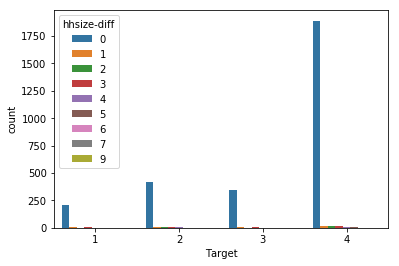

In [83]:
sns.countplot('Target', hue='hhsize-diff', data = hhsize_diff)

In [84]:
## There is not much difference

#### Lets take another variable coopele

coopele - Electricity form cooperative

    public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
    planpri, =1 electricity from private plant
    noelec, =1 no electricity in the dwelling
    coopele, =1 electricity from cooperative

We will look into all these variable, as all are related to electricity

In [85]:
#ele_df = heads['public', 'planpri', 'noelec', 'coopele']

In [86]:
heads[['public', 'planpri', 'noelec', 'coopele']].corr()

,public,planpri,noelec,coopele
public,1.000000,-0.072443,-0.153856,-0.974788
planpri,-0.072443,1.000000,-0.001430,-0.009058
noelec,-0.153856,-0.001430,1.000000,-0.019238
coopele,-0.974788,-0.009058,-0.019238,1.000000


In [87]:
ele_col = ['public', 'planpri', 'noelec', 'coopele']

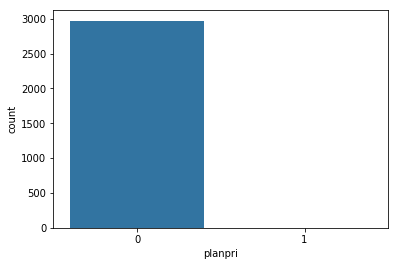

In [88]:
sns.countplot('planpri', data = heads)

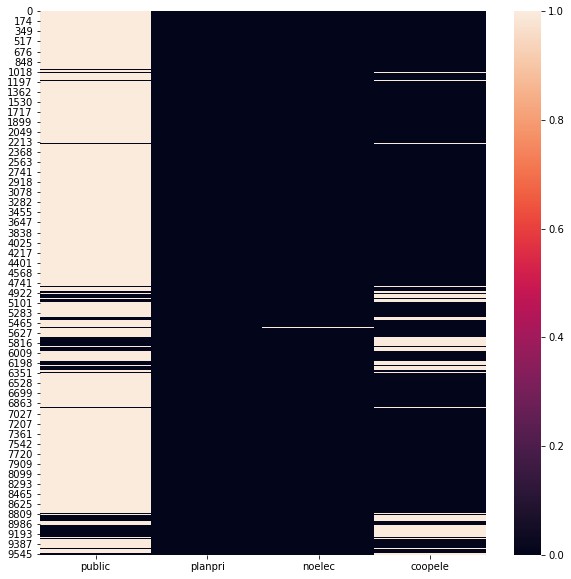

In [89]:
plt.figure(figsize= (10,10))
sns.heatmap(heads[['public', 'planpri', 'noelec', 'coopele']])

We see that all four are related to eachother

Create a ordinal variable out of these four variables

    0: No electricity
    1: Electricity from cooperative
    2: Electricity from CNFL
    3: Electricity from private plant
        

        

In [90]:
for col in ele_col:
    print(f'the value count of {col} is {heads[col].value_counts()}')
    

the value count of public is 1    2635
0     338
Name: public, dtype: int64
the value count of planpri is 0    2971
1       2
Name: planpri, dtype: int64
the value count of noelec is 0    2964
1       9
Name: noelec, dtype: int64
the value count of coopele is 0    2650
1     323
Name: coopele, dtype: int64


Calculate all the 1's

In [91]:
(2635 + 2 + 9 + 323)

2969

In [92]:
heads.shape

(2973, 99)

##### 4 houses do not have any thing, they donot intake electricity from anywhere

In [93]:
elec = []

## Assign values
for i, row in heads.iterrows():
    if row['noelec'] ==1:
        elec.append(0)
    elif row['coopele'] ==1:
        elec.append(1)
    elif row['public']==1:
        elec.append(2)
    elif row['planpri']==1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [94]:
## Create a new variable with missing values
len(elec)


2973

In [95]:
heads['elec'] = elec
heads['elec_missing'] = heads['elec'].isnull()

In [96]:
## Lets check the relationship between elec and target

elec_cat = heads[['elec', 'Target']]

In [97]:
elec_cat['elec']= elec_cat['elec'].astype('category')
elec_cat['Target']= elec_cat['Target'].astype('category')

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


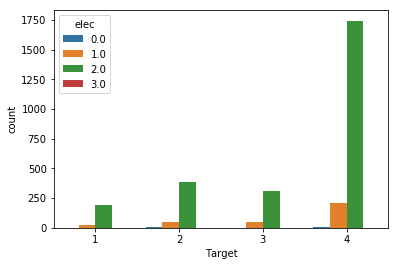

In [98]:
sns.countplot('Target', hue='elec', data = elec_cat)

Extreme poot households, consume from CNFL followed by cooperative

#### Lets investigate area1 and area 2 w.r.t target variable

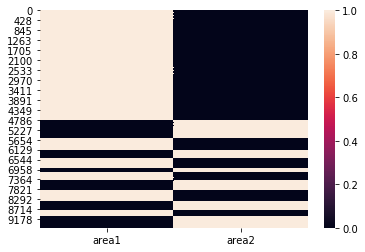

In [99]:
sns.heatmap(heads[['area1', 'area2']])

In [100]:
## Both area1 and area2 are related to eachother, so we can drop either of the area

In [101]:
heads = heads.drop(columns='area2')

In [102]:
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4         0.582249
       2         0.176331
       3         0.147929
       1         0.093491
1      4         0.687030
       2         0.137688
       3         0.108083
       1         0.067199
Name: Target, dtype: float64

It's clear that hosuseholds living in urban area (area1) are more likely to have low poverty level, very few household are 
below poverty level in urban area (area0)

## Creating ordinal variable

    epared1, =1 if walls are bad
    epared2, =1 if walls are regular
    epared3, =1 if walls are good
    etecho1, =1 if roof are bad
    etecho2, =1 if roof are regular
    etecho3, =1 if roof are good
    eviv1, =1 if floor are bad
    eviv2, =1 if floor are regular
    eviv3, =1 if floor are good

These variables we will be merging in one column if possible, we will start with wall, where bad<regular<good

In [103]:
# Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis=1)

In [104]:
heads['walls'].value_counts()

2    1748
1     921
0     304
Name: walls, dtype: int64

In [105]:
heads = heads.drop(columns =['epared1', 'epared2', 'epared3'] )

In [106]:
walls_cat = heads[['walls', 'Target']]


In [107]:
walls_cat['walls'] = walls_cat['walls'].astype('category')
walls_cat['Target'] = walls_cat['Target'].astype('category')

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


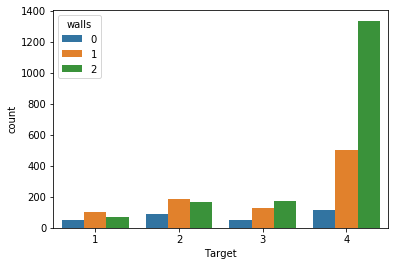

In [108]:
sns.countplot('Target', hue='walls', data = walls_cat)

    Bad walls are neither too high nor too low for households below or above poverty,
    where as good walls mostly lie in households which are above poverty line
    regular walls are mostly lie in both types households above or below poverty line

#### Roof

    etecho1, =1 if roof are bad
    etecho2, =1 if roof are regular
    etecho3, =1 if roof are good

In [109]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis=1)

In [110]:
heads.roof.value_counts()

2    1750
1     831
0     392
Name: roof, dtype: int64

In [111]:
roof_cat = heads[['roof', 'Target']]

heads['roof'] = heads['roof'].astype('category')
heads['Target'] = heads['Target'].astype('category')

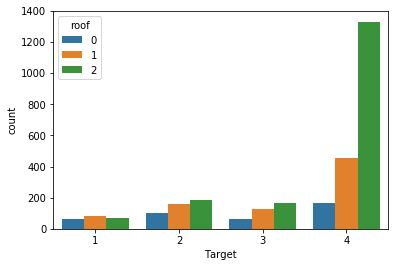

In [112]:
sns.countplot('Target', hue='roof', data = heads)

    eviv1, =1 if floor are bad
    eviv2, =1 if floor are regular
    eviv3, =1 if floor are good

### Floor


In [113]:
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis=1)

In [114]:
heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3', 'etecho1', 'etecho2', 'etecho3'])

#### Dropped unwanted columns

## Feature Constructions

Apart from creating ordinal variable from binary variable (with help of mapping), we can create totally new features from existing data
This is known as "Feature Construction".

    For instance: 
        We can create new features by adding all the thtee features we just mapped from binary variables.
        We can add these three features and create a variable which tells us oveall quality of house hold structure

In [115]:
## Creating new features

(heads['walls'] + heads['floor'] ).shape

(2973,)

In [116]:
heads['roof'] = heads['roof'].astype('int64')

In [117]:
heads['walls+floor+roof'] = heads['walls'] + heads['roof'] + heads['floor']

In [118]:
heads.shape

(2973, 95)

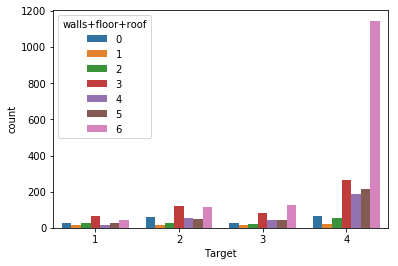

In [119]:
sns.countplot('Target', hue='walls+floor+roof', data=heads)

The households that belongs to lowest poverty level, tends to have a better household structure
This new feature may be more helpfull when compared to rest other variables.

    pisonotiene, =1 if no floor at the household
    abastaguano, =1 if no water provision
    noelec, =1 no electricity in the dwelling
    sanitario1, =1 no toilet in the dwelling
    energcocinar1, =1 no main source of energy used for cooking (no kitchen)

In [120]:
## We will look into variables thet do not have few facilities, 
## Lets print them to have a closer look

heads[['pisonotiene', 'abastaguano', 'noelec', 'sanitario1', 'energcocinar1']].tail(8)

,pisonotiene,abastaguano,noelec,sanitario1,energcocinar1
9530,0,0,0,0,0
9531,0,0,0,0,0
9534,0,0,0,0,0
9535,0,0,0,0,0
9541,0,1,0,0,0
9545,0,0,0,0,0
9551,0,0,0,0,0
9552,0,0,0,0,0


We see most of them are zeros, its like a sparse matrix 

In [121]:
## We add all these columns to get the lowest poverty level

heads['warnings'] = heads['pisonotiene'] + heads['abastaguano'] + heads['noelec'] + heads['sanitario1'] + heads['energcocinar1']

In [122]:
heads['warnings'].value_counts()

0    2901
1      59
2      11
3       1
4       1
Name: warnings, dtype: int64

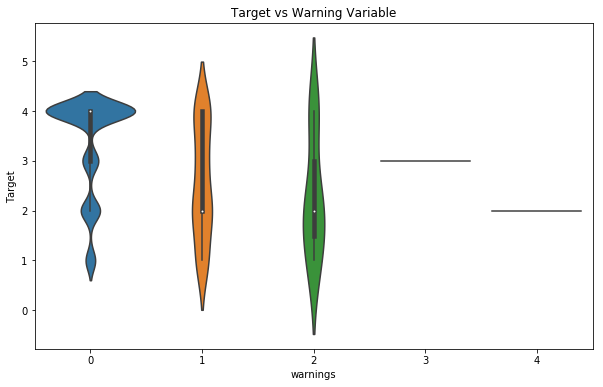

In [123]:
plt.figure(figsize = (10, 6))
sns.violinplot(y = 'Target', x = 'warnings',  data = heads, orient='v');
plt.title('Target vs Warning Variable');

In [124]:
heads['warnings'].value_counts()

0    2901
1      59
2      11
3       1
4       1
Name: warnings, dtype: int64

## Lets include more negative variables to warnings like, this can be a part of model improvement

    computer, =1 if the household has notebook or desktop computer
    television, =1 if the household has TV
    refrig, =1 if the household has refrigerator
    v18q, owns a tablet

In [125]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] =  (heads['refrig'] + (heads['v18q1'] >0)+ heads['television'] + heads['computer'])

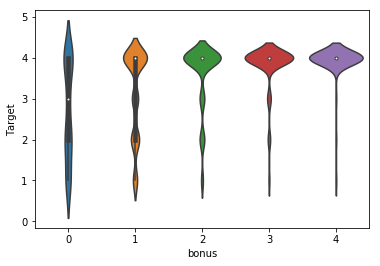

In [126]:
sns.violinplot('bonus', 'Target', data = heads, orient='v')

## Per capita features:
we will do it later on

In [132]:
pickle_out = open('heads.pickle', 'wb')
pickle.dump(heads, pickle_out)

In [131]:
import pickle